# Análise de risco II
Vamos refazer a análise de risco I ultilizando outras métricas e aplicar ensinamentos das aulas passadas como balanceamento de classes sem balancear os dados de teste, pois como dito, isso remove a realidade dos dados. [Leia mais aqui!](https://medium.com/@dev.daniel.amorim/balanceamento-de-classes-6eca350c465a)

* Entendimento
* Coleta de dados
* Tratamento dos dados
* Limpeza dos dados
* Análise exploratória

# Bibliotecas

In [648]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import LabelEncoder

# Coleta de dados

In [649]:
df = pd.read_csv("database.csv", sep=",")
display(df[:3])

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN


# Tratamento dos dados

## - Colunas irrelevantes
Colunas que não afetam em nada nossos dados como id, nome, dados criptografadas e etc portanto serão excluídas. São elas:

In [650]:
irrelevantes = ['ids', 'score_1', 'score_2','reason', 'state', 'zip', 
                'channel', 'job_name', 'real_state', 
                'external_data_provider_first_name', 'profile_phone_number',
               'user_agent']

## - Dados faltantes:

In [651]:
(df.isnull().sum() / df.shape[0] *100).sort_values(), df.shape

(ids                                                  0.000000
 email                                                0.000000
 external_data_provider_credit_checks_last_month      0.000000
 external_data_provider_first_name                    0.000000
 external_data_provider_fraud_score                   0.000000
 profile_phone_number                                 0.000000
 application_time_applied                             0.000000
 reported_income                                      0.000000
 shipping_state                                       0.000000
 application_time_in_funnel                           0.000000
 score_6                                              0.000000
 profile_tags                                         0.000000
 score_5                                              0.000000
 score_4                                              0.000000
 shipping_zip_code                                    0.000000
 risk_rate                                            1

#### A tabela possui 45mil linhas e 43 colunas, destas, 5 colunas possuem 50% ou mais de dados faltantes  portanto serão excluídas, são elas:<br>

In [652]:
muitos_faltantes = [ 'external_data_provider_credit_checks_last_2_year', 
                       'ok_since', 'last_borrowed_in_months', 
                       'last_amount_borrowed', 'target_fraud']

## - Anomalias e inconsistências

In [653]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


#### Anomalias encontradas:

reported_income: valores infinitos

external_data_provider_email_seen_before: valores negativos muito alto

In [654]:
print(f'Qntd de INF em reported_income: {len(df[df["reported_income"] == np.inf])}')

Qntd de INF em reported_income: 67


In [655]:
print(f'Qnt de NEGATIVOS em external_data_provider_email_seen_before: {len(df[df["external_data_provider_email_seen_before"] < 0])}')

Qnt de NEGATIVOS em external_data_provider_email_seen_before: 1293


## - Verificando colunas categóricas

In [656]:
df.select_dtypes(include='object').head(4)

,ids,target_default,score_1,score_2,reason,facebook_profile,state,zip,channel,job_name,...,application_time_applied,email,external_data_provider_first_name,lat_lon,marketing_channel,profile_phone_number,shipping_state,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,...,07:52:34,outlook.com,leidelaura,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,BR-MT,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,...,02:34:29,gmail.com,diocezio,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,BR-RS,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,...,00:60:02,gmail.com,veralucia,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,BR-RR,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,...,11:20:49,spgov.com,venice,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,BR-RN,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN


In [657]:
df.email.unique()

array(['outlook.com', 'gmail.com', 'spgov.com', 'hotmail.com',
       'hotmaill.com', 'gmaill.com'], dtype=object)

O que iremos tratar nas colunas categóricas:

**email**: Há colunas com erro de digitação;<br>
**shipping_state**: Vamos retirar o BR e ficar somente com as siglas dos estados;<br>
**lat_lon**: Separar LAT e LON em duas colunas distintas;<br>
**application_time_applied**: Retirar somente as horas;<br>

O restante iremos transformar em variáveis dummies.


### - Verificando se os tipos de dados (dtypes) estão compatíveis

In [658]:
# verificando os tipos de dados
print(df.dtypes)
print("---"*20)
# ver o primeiro dado de cada coluna pra conferir com os tipos de dados
print(df.iloc[0])

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

#### OK! os tipos de dados batem, não erá necessária nenhuma conversão de dados.

# Limpeza dos dados
Vamos realizar inicialmente tudo que propomos na 'Análise Exploratória'

### - Removendo colunas

In [659]:
# Removendo colunas irrelevanes
df = df.drop(irrelevantes, axis=1)

In [660]:
# Removendo colunas com mais de 50% faltantes
df = df.drop(muitos_faltantes, axis=1)

### - Removendo valores inf

In [661]:
# Removendo linhas INF da coluna 'reported_income'
df = df[df['reported_income']!= np.inf]

### - Corrigindo/alterando valores em linhas

In [662]:
# Tratando a coluna com emails errados
df.loc[df['email'] == 'hotmaill.com', 'email'] = 'hotmail.com'
df.loc[df['email'] == 'gmaill.com', 'email'] = 'gmail.com'

In [663]:
# removendo BR da coluna 'df.shipping_state'
df.shipping_state = df.shipping_state.str.replace("BR-", "")

In [664]:
# Separar LAT e LON em duas colunas
'''
Traduçõo do código abaixo: Crie a col df['lat'] = na coluna LAT_LON, 
separe pela ',',no index 0, remova '(' e transforme o resultado em float.
mesma coisa pra criar a coluna df['lon'].
'''
df['lat'] = df['lat_lon'].str.split(',').str[0].str.replace('(', '').astype(float)
df['lon'] = df['lat_lon'].str.split(',').str[1].str.replace(')', '').astype(float)

# Remova a coluna 'lat_lon'
df = df.drop('lat_lon', axis=1)

C:\Users\devda\AppData\Local\Temp\ipykernel_15768\2203726783.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['lat'] = df['lat_lon'].str.split(',').str[0].str.replace('(', '').astype(float)
C:\Users\devda\AppData\Local\Temp\ipykernel_15768\2203726783.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['lon'] = df['lat_lon'].str.split(',').str[1].str.replace(')', '').astype(float)


In [665]:
# Retirar as horas da coluna 'application_time_applied'
'''
Explicando: crie a coluna hora_default = df.'aplli.applied' pegue as 2 strings converta para inteiro
'''
df['hora_default'] = df['application_time_applied'].str[:2].astype(int)
# substituindo hora 24 por 0h
df.loc[df['hora_default'] == 24, 'hora_default'] = 0
# Removendo coluna 'application_time_applied'
df = df.drop('application_time_applied', axis=1)

### - Tratando colunas profile tags
    - Uma das colunas críticas é a coluna 'profile_tags', ela possui muitos caracteres especiais, vamos separa-las para depois transforma-la em variáveis dummies.

In [666]:
# para cada caracter substitua por "vazio"
for caracter in "{}[]:,'":
    df['profile_tags'] = df['profile_tags'].str.replace(caracter, "")
# substitua "tags" ´por "vazio"    
df['profile_tags'] = df['profile_tags'].str.replace('tags', "")

C:\Users\devda\AppData\Local\Temp\ipykernel_15768\1937116933.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['profile_tags'] = df['profile_tags'].str.replace(caracter, "")


In [667]:
df.select_dtypes(include='object').head(4)

,target_default,facebook_profile,email,marketing_channel,shipping_state,profile_tags
0,False,True,outlook.com,Invite-email,MT,n19 n8
1,False,False,gmail.com,Radio-commercial,RS,n6 n7 nim
2,True,NaN,gmail.com,Waiting-list,RR,n0 n17 nim da
3,False,False,spgov.com,Waiting-list,RN,n4


### - Tratando cuidadosamente dados faltantes 
Vamos tratar cuidadosamente dados faltantes para evitar perda de dados, aqui será empregado algumas técnicas dependendo da coluna, seja eliminando desde que o tipo de dados não compense preencher com dados fictícios, seja preenchando pela média, moda ou médiana ou até mesmo por maior proporcionalidade.

In [668]:
df.isnull().sum().sort_values(ascending=False)

external_data_provider_credit_checks_last_year     15108
credit_limit                                       13780
n_issues                                           11525
facebook_profile                                    4456
marketing_channel                                   3571
target_default                                      3258
external_data_provider_email_seen_before            2231
lon                                                 1362
lat                                                 1362
n_bankruptcies                                       697
n_defaulted_loans                                    574
n_accounts                                           562
income                                               562
score_3                                              562
risk_rate                                            562
shipping_zip_code                                      0
shipping_state                                         0
profile_tags                   

#### * Coluna "external_data_provider_credit_checks_last_year"

In [669]:
df["external_data_provider_credit_checks_last_year"].value_counts()

1.0    15008
0.0    14817
Name: external_data_provider_credit_checks_last_year, dtype: int64

**external_data_provider_credit_checks_last_year**:
São 15mil dados faltantes, não vale a pena descartar tanta informação, como a coluna trata-se de verificação de crédito no último ano, o mais sensato é preencher com 'zero' (minoria), melhor informar que não sabemos se foi feita a verificação do que afirmar que foi verificado, nesse caso proporcionalidade não funciona pois proporcionalmente valor 1 é maior.


In [670]:
# Preenchando valores faltantes na coluna external_data_provider_credit_checks_last_year com "zero"
df.loc[df.external_data_provider_credit_checks_last_year.isnull(), 'external_data_provider_credit_checks_last_year'] = 0

#### * Coluna 'credit_limit'

In [671]:
df.loc[df.credit_limit == 0, 'credit_limit'].shape

(5264,)

**credit_limit**
Essa coluna possui 13 mil linhas faltantes e 5 mil com 0 de crédito, se preenchermos os 13 mil com zero, ficaremos com 18 mil com crédito zero, quase a metade, porém nosso modelo vai poder análisar o risco de quem tem crédito e de quem não tem de forma justa (metade e metade), acho mais sensato preencher com zeros e não perder 13 mil linhas de dados.

In [672]:
# Preenchando valores faltantes na coluna 'credit_limit' com "zero"
df.loc[df.credit_limit.isnull(), 'credit_limit'] = 0

#### * Coluna 'n_issues' e 'n_accounts'

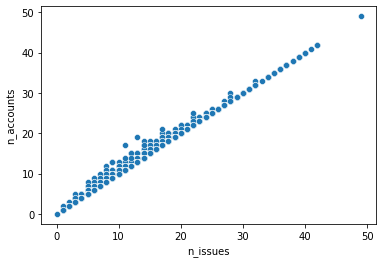

In [673]:
sns.scatterplot(x='n_issues', y='n_accounts', data=df)
plt.show()

Notei que a coluna "n_issues" e "n_accounts" estão fortemente correlacionadas, as duas apresentam em sua maioria os mesmos dados, então cheguei a conclusão que é melhor excluir a coluna "n_issues" que apresenta 11 mil linhas de dados faltantes, do que excluir estas linhas e perder todos esses dados já que a coluna "n_accounts" tem praticamente as mesmas informações, sendo assim, excluirei somente as 562 linhas de dados faltantes da coluna "n_accounts" preservando os dados.

In [674]:
# excluindo coluna 'n_issues'
df = df.drop('n_issues', axis=1)
# excluindo linhas faltantes da coluna "n_accounts"
df.dropna(subset=['n_accounts'], inplace=True)

#### * n_defaulted_loans

In [675]:
df.n_defaulted_loans.value_counts()

0.0    44185
1.0      152
2.0       17
3.0        4
5.0        1
Name: n_defaulted_loans, dtype: int64

Verifiquei que a coluna n_defaulted_loans possuem 98% de valores "0", ou seja, não acrescenta em nada na nossa análise, iremos exclui-la.

In [676]:
df = df.drop('n_defaulted_loans', axis=1)

#### * Colunas restantes

Sobraram poucas colunas com poucos dados faltantes, na ordem máxima de de 4 mil, destas não é aconselhavel preencher com media, moda ou mediana, nem criar dados fictícios, melhor preservar a idoneidade dos dados diante de tão pouco dados faltantes num universo de 44 mil linhas, então iremos ecluir estas linhas.

Uma dica que deixo registrada a quem esta lendo essa análise é, sempre deixe pra excluir linhas faltantes por último, primeiro analise as colunas que podem ser excluídas pois linhas excluida de uma coluna implica em exclusão de dados das outras colunas também acarretando perda de dados desnecessárias.

In [677]:
faltantes = ['facebook_profile', 'marketing_channel','target_default',
             'external_data_provider_email_seen_before', 'lon', 'lat',
             'n_bankruptcies']

# Excluindo dados faltantes das colunas restantes
for col in faltantes:
    df.dropna(subset=[col], inplace=True)

In [678]:
# Agora estamos com nossa tabela limpa!
df.isnull().sum()

target_default                                     0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
credit_limit                                       0
income                                             0
facebook_profile                                   0
n_bankruptcies                                     0
n_accounts                                         0
application_time_in_funnel                         0
email                                              0
external_data_provider_credit_checks_last_month    0
external_data_provider_credit_checks_last_year     0
external_data_provider_email_seen_before           0
external_data_provider_fraud_score                 0
marketing_channel                                  0
reported_income                               

# Análise exploratória

### - Funções (Gráficas e IRQ - Quartis)

In [679]:
# Função que calcula limites inferiores e superiores dos outliers
def limites(col):
    q1= col.quantile(0.25)
    q3= col.quantile(0.75)
    amplitude = q3 - q1
    lim_inferior = q1 - 1.5 * amplitude
    lim_superior = q3 + 1.5 * amplitude
    return lim_inferior, lim_superior

In [680]:
# Função para remover outliers
def remover_outliers(df, nome_col):
    
    # pega a qnt de linhas da tabela
    qnt_linhas_anteriores = df.shape[0]

    # pega os limites inferior e superior
    lim_inf, lim_sup = limites(df[nome_col])
    
    # filtra para o dataframe somente os valores dentro dos limites
    df = df.loc[(df[nome_col] >= lim_inf) & (df[nome_col] <= lim_sup), :]
    
    # pega a quantidade de linhas removidas e sua porcentagem referente ao df
    linhas_removidas = qnt_linhas_anteriores - df.shape[0]
    porc_linhas_remov = (linhas_removidas/qnt_linhas_anteriores)

    # Retona df filtrado, linhas removidas e a porcentagem de linhas removidas
    return df, linhas_removidas, porc_linhas_remov

In [681]:
def diagrama_caixa(coluna):
    # define um grafico do lado do outro 1 linha 2 colunas(plt do matplotlib)
    # ax1 = eixo do 1º grafico e ax2 do segundo.
    fig, (ax1, ax2) = plt.subplots(1, 2) 
    
    # seta tamanho do grafico
    fig.set_size_inches(15,5) 
    
    # cria grafico automático com os valores da coluna recebida
    sns.boxplot(x=coluna, ax = ax1)
    
    # cria grafico automático com os valores da coluna recebida
    # com a diferença que ax2 vai ficar entre os limites inferior e superior
    # então chamamos a função "limites"
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax = ax2)

In [682]:
def histograma(coluna):
    sns.displot(data=coluna, kde=True, height=3, aspect=2)

In [683]:
def relação_entre_2_colunas(tabela, col1, col2, ordem):
    ''' Função que faz a relação de impacto de uma coluna (col1) sobre a outra 
        (col2) de uma (tabela)
        Em suma agrupamos uma coluna e fazemos a média da outra em relação a ela mesmo.
        ordem = por index = 'ind' ou ordenar por valor = 'val'
        
        EXEMPLO: Imagine uma tabela de "crimes", nela temos 2 colunas "hora" e "numero de assaltos", 
        a função agrupa por "hora" e faz a média do "numero de assalto" a cada hora
    '''
    fig, ax = plt.subplots(figsize=(10,6))
    # agrupa na tabela grouped pela (col1) e faz a média da (col2) ordenado por valor ou por index
    group = tabela.groupby(col1).mean()
    # ordena por valor da coluna
    if ordem == 'val':
        grouped = group[col2].sort_values(ascending=False)
    # Ordena pelo index da coluna
    if ordem == 'ind':
        grouped = group[col2].sort_index()
    
    ax.bar(grouped.index, grouped, color='lightgreen')
    ax.grid(False)
    ax.set_xlabel('')
    ax.set_xticklabels(grouped.index, rotation=90)
    ax.set_xticks(range(0, 25))
    ax.tick_params(colors='grey')
    ax.set_title(f'Impacto de {col1} sobre {col2}', fontsize=14, alpha=0.6)

    plt.tight_layout()

### - Tratamento de outliers

C:\Users\devda\AppData\Local\Temp\ipykernel_15768\347960219.py:15: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax2.set_xlim(limites(coluna))


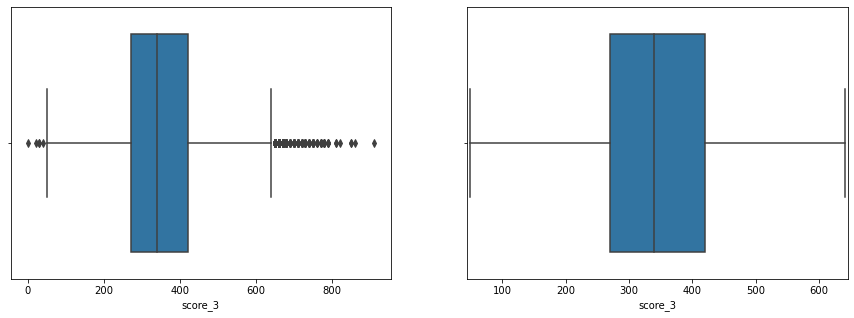

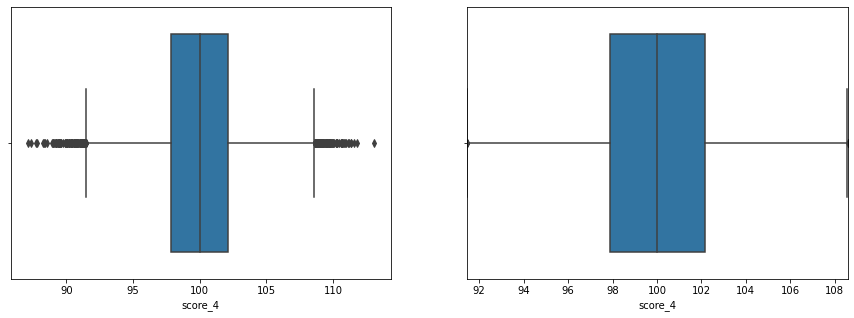

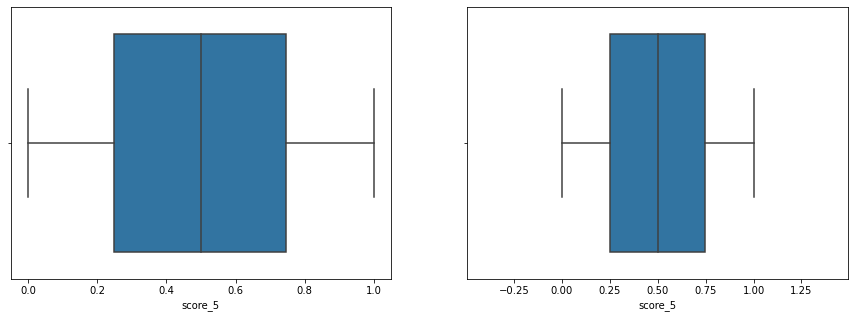

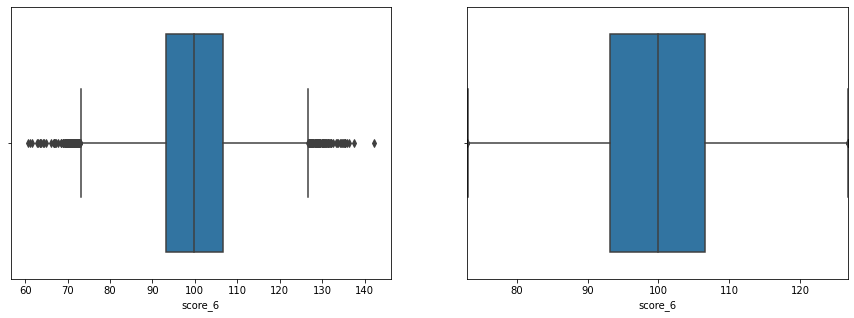

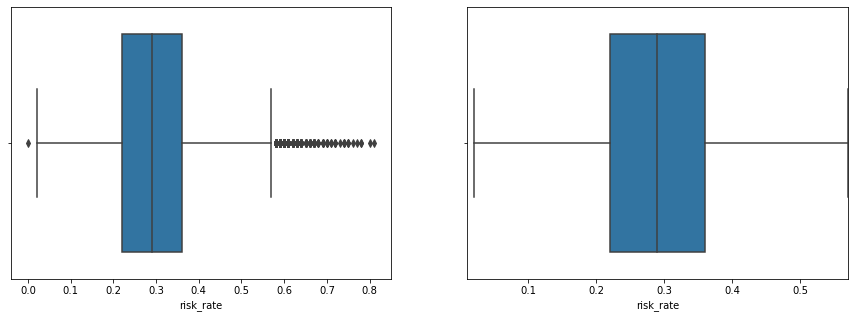

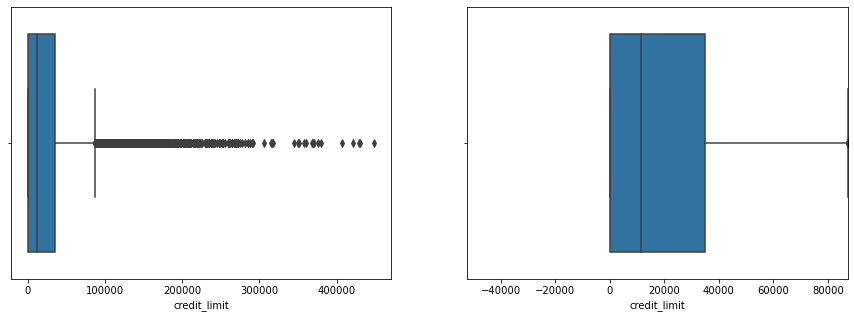

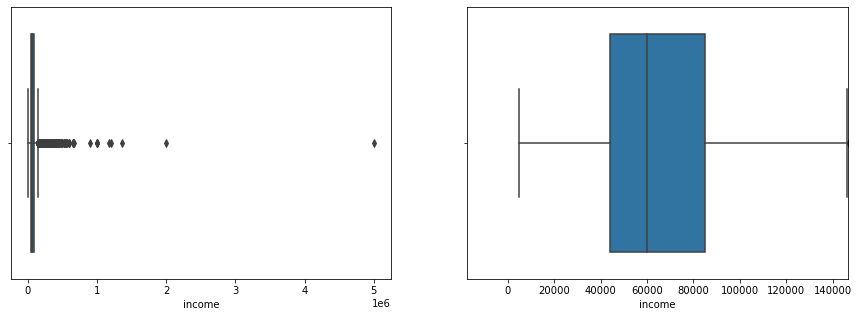

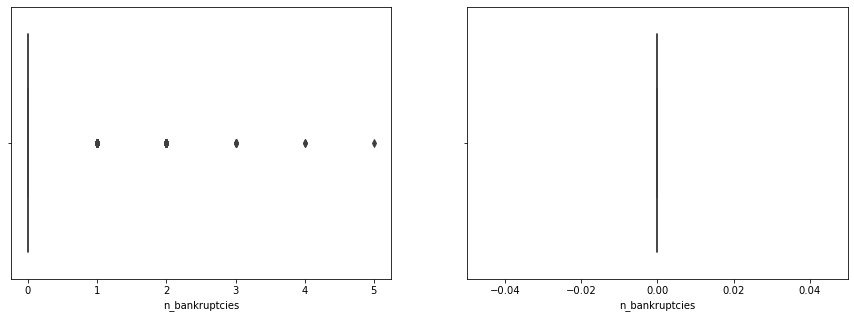

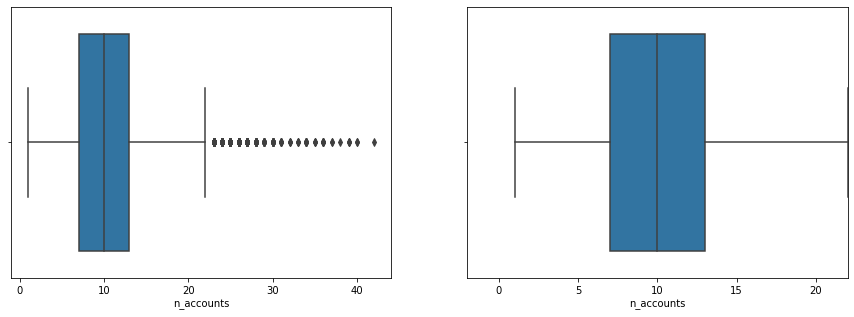

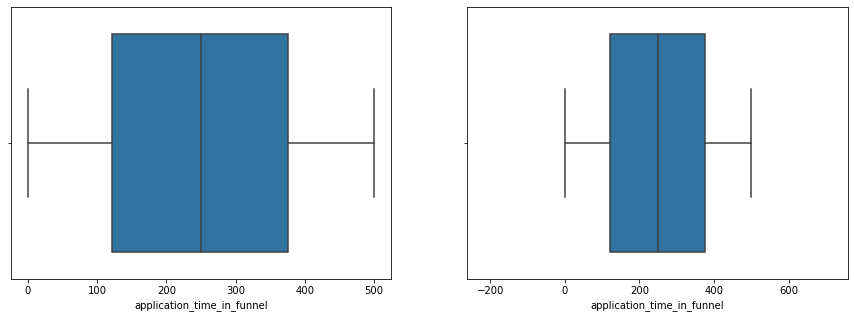

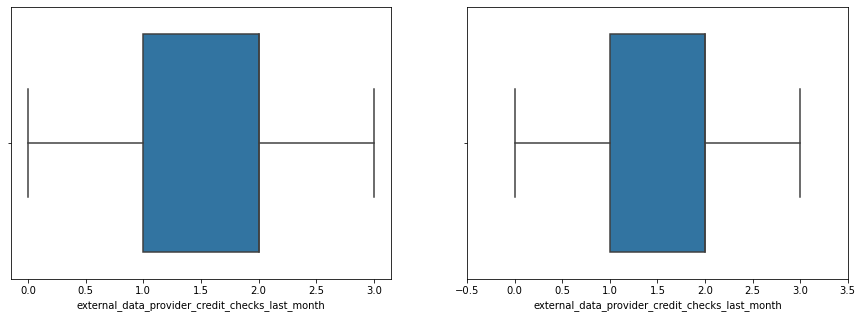

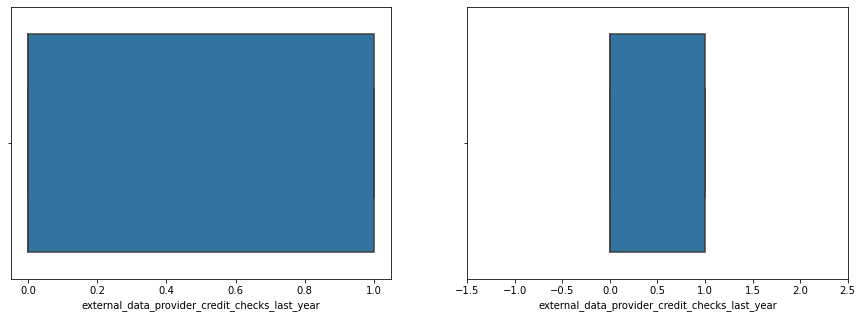

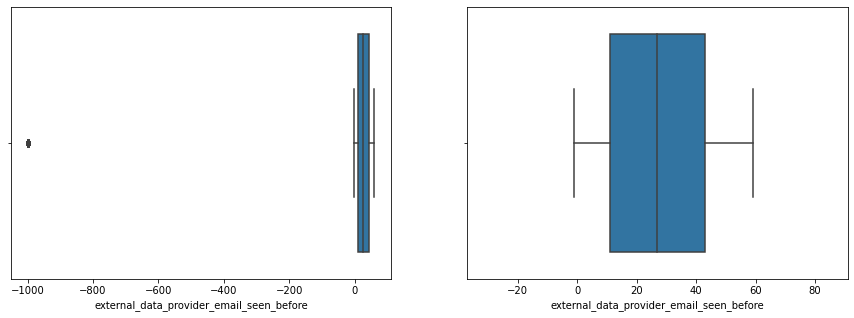

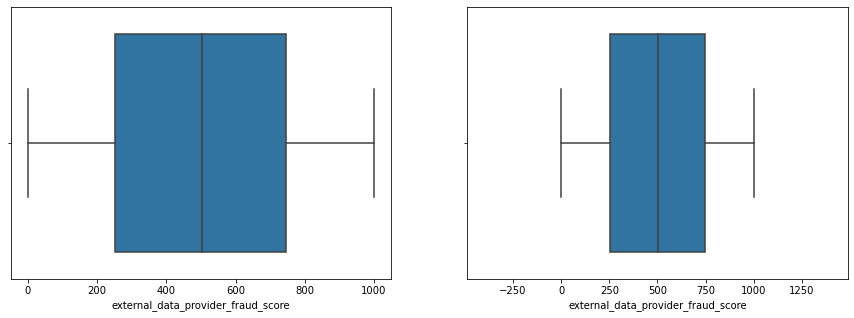

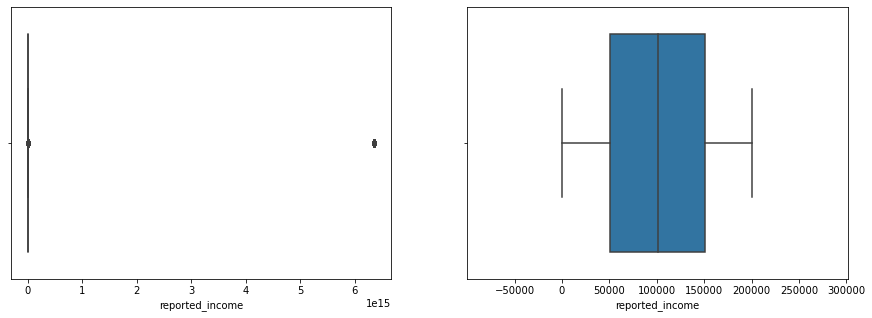

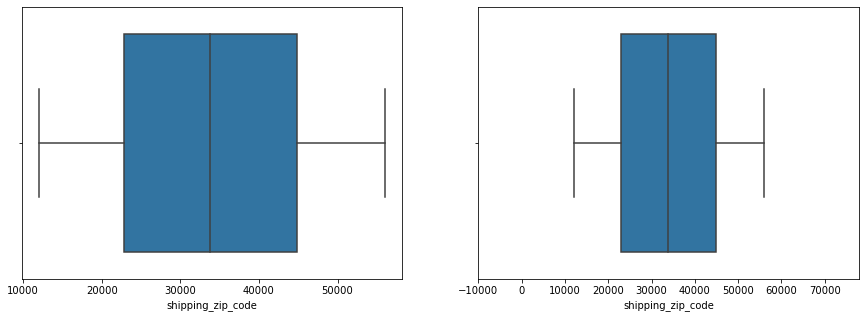

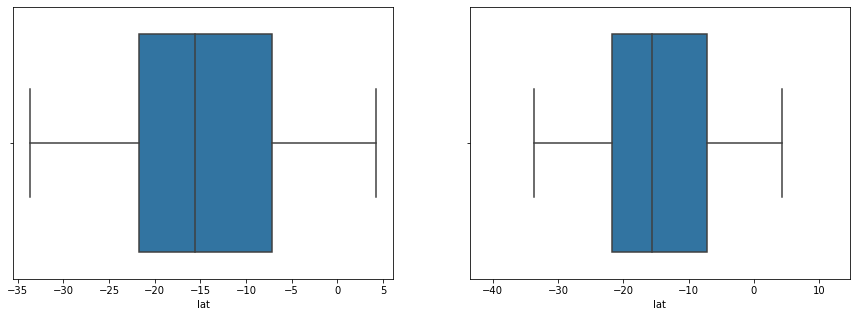

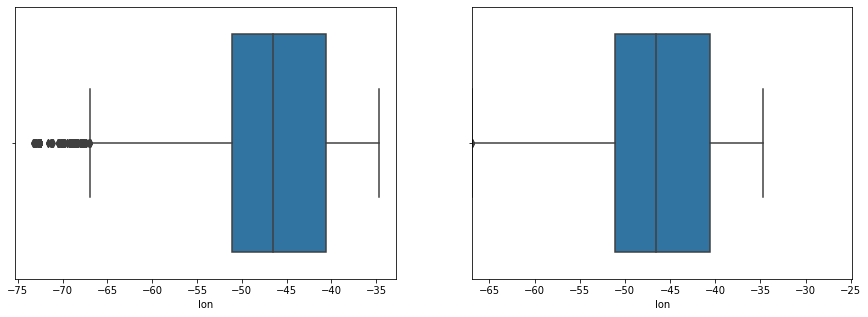

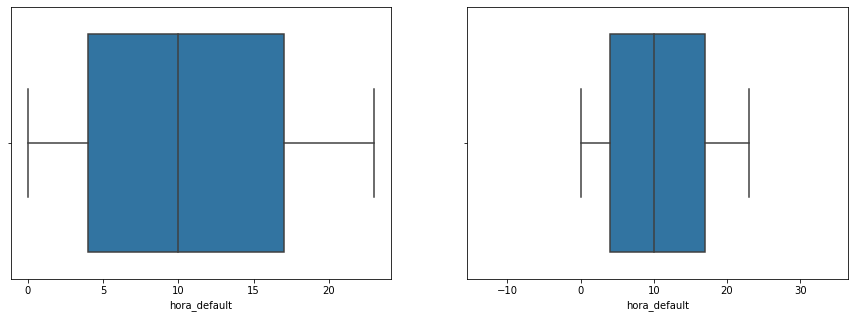

In [684]:
# PLotando todas as colunas numéricas
for col in df.columns:
    # Somente para colunas não categóricas
    if df[col].dtypes != "object":
        diagrama_caixa(df[col])

In [685]:
df.n_bankruptcies.value_counts()

0.0    29322
1.0     2353
2.0       29
3.0        5
4.0        2
5.0        1
Name: n_bankruptcies, dtype: int64

**Vamos remover outliers das colunas:**

remov_outliers = ['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'credit_limit', 'income',
               'n_accounts', 'application_time_in_funnel', 'external_data_provider_credit_checks_last_month',
               'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before',
               'external_data_provider_fraud_score', 'reported_income', 'shipping_zip_code']

**Não vamos remover outliers das colunas:**

**n_bankruptcies:** As outliers não são excessões, e neste caso os outliers podem sim influenciar em casos de fraudes.<br>


### - Removendo outliers das colunas analisadas

score_3: 231 linhas excluidas, equivalem a 0.73% do df
score_4: 228 linhas excluidas, equivalem a 0.72% do df
score_5: 0 linhas excluidas, equivalem a 0.00% do df
score_6: 212 linhas excluidas, equivalem a 0.68% do df
risk_rate: 275 linhas excluidas, equivalem a 0.89% do df
credit_limit: 1433 linhas excluidas, equivalem a 4.66% do df
income: 1151 linhas excluidas, equivalem a 3.92% do df
n_accounts: 383 linhas excluidas, equivalem a 1.36% do df
application_time_in_funnel: 0 linhas excluidas, equivalem a 0.00% do df
external_data_provider_credit_checks_last_month: 0 linhas excluidas, equivalem a 0.00% do df
external_data_provider_credit_checks_last_year: 0 linhas excluidas, equivalem a 0.00% do df
external_data_provider_email_seen_before: 420 linhas excluidas, equivalem a 1.51% do df
external_data_provider_fraud_score: 0 linhas excluidas, equivalem a 0.00% do df
reported_income: 211 linhas excluidas, equivalem a 0.77% do df
shipping_zip_code: 0 linhas excluidas, equivalem a 0.00% do df


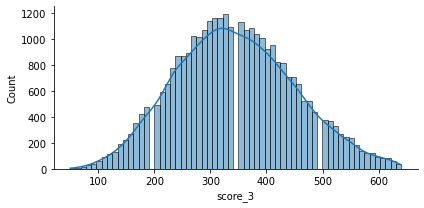

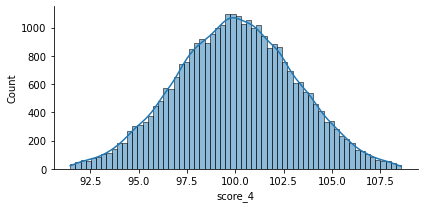

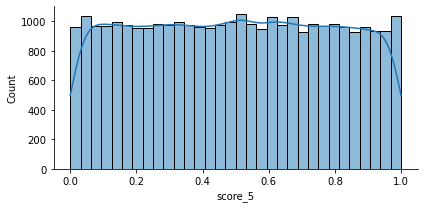

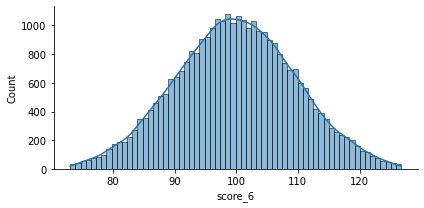

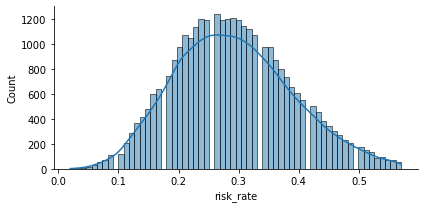

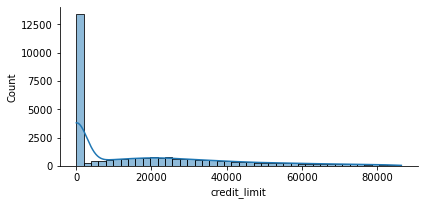

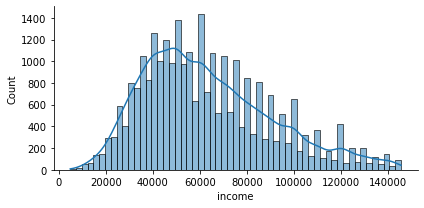

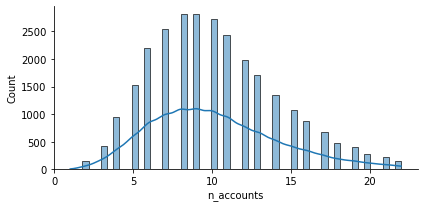

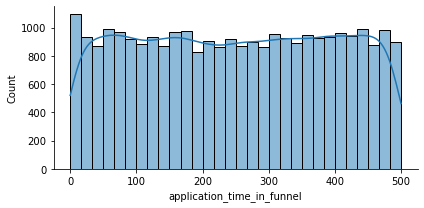

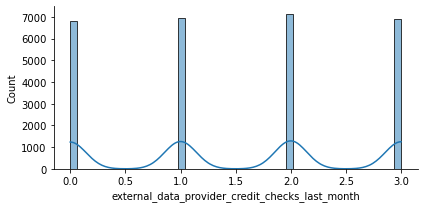

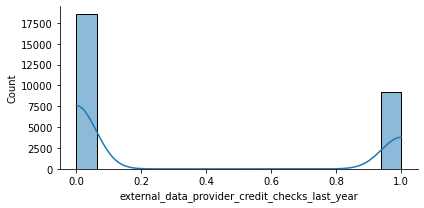

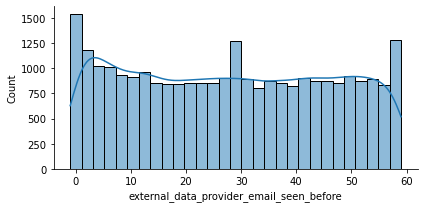

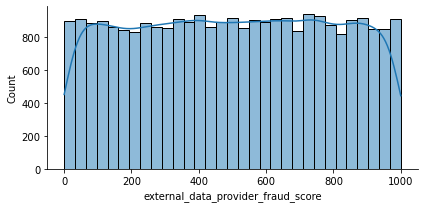

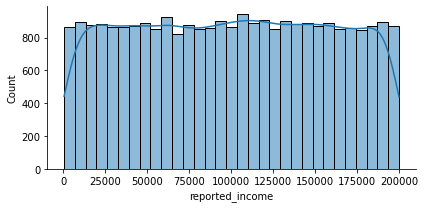

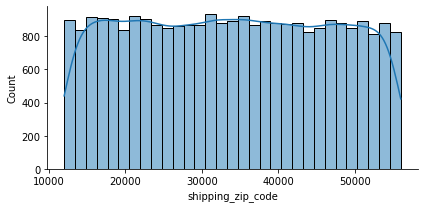

In [686]:
# lista de coluna para remover
remov_outliers = ['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'credit_limit', 'income',
               'n_accounts', 'application_time_in_funnel', 'external_data_provider_credit_checks_last_month',
               'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before',
               'external_data_provider_fraud_score', 'reported_income', 'shipping_zip_code']

for col in remov_outliers:
    df, linhas_excluidas, porc_excluida = remover_outliers(df, col)
    print(f'{col}: {linhas_excluidas} linhas excluidas, equivalem a {porc_excluida:.2%} do df')
    histograma(df[col])

### - Analisando coluna e suas relações com nossa variável alvo(target_default)
Mas antes vamos converter "target_default" para coluna numérica

In [687]:
# Importando Label Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Aplicando o encoder
encoder = LabelEncoder().fit(df["target_default"])
df["target_default"] = encoder.transform(df["target_default"])

### Verificando horas com relação a default
**Conclusão:**<br>
Nos horários entre 0 e 6h ocorrem maior índice de default

C:\Users\devda\AppData\Local\Temp\ipykernel_15768\3569568502.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped.index, rotation=90)


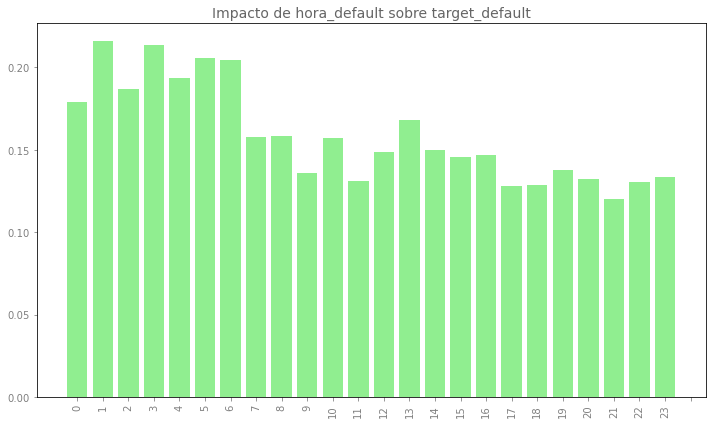

In [688]:
# chama a função de impacto entre colunas
relação_entre_2_colunas(df, 'hora_default', 'target_default', 'ind')

### Verificando estados com relação a default
**Conclusão:**<br>
RR e MG apresentam maior indice de default, enquanto RS e SC menor índice.

C:\Users\devda\AppData\Local\Temp\ipykernel_15768\3569568502.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped.index, rotation=90)


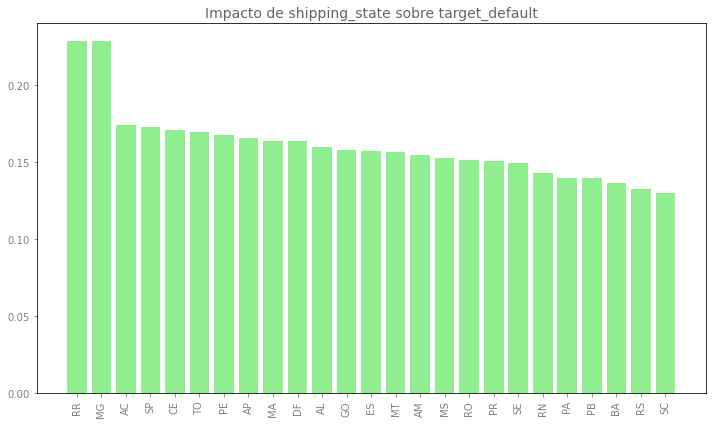

In [689]:
# chama a função de impacto entre colunas
relação_entre_2_colunas(df, 'shipping_state', 'target_default', 'val')

### Verificando canais de divulgação com relação a default
**Conclusão:**<br>
Pessoas vindas por meio de sites da web tendem a uma maior taxa de default.


C:\Users\devda\AppData\Local\Temp\ipykernel_15768\3569568502.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped.index, rotation=90)


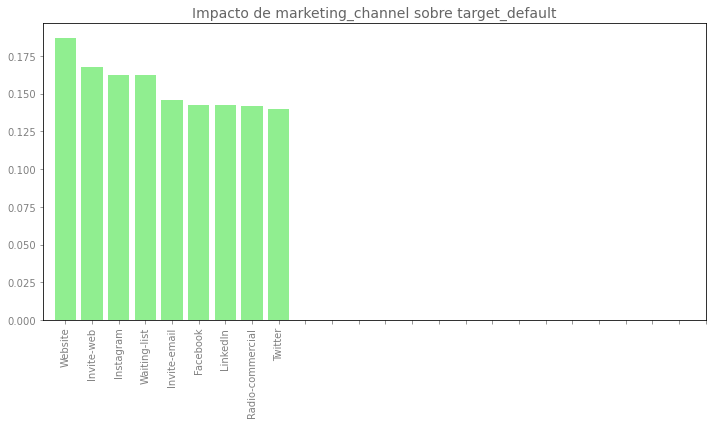

In [690]:
# chama a função de impacto entre colunas
relação_entre_2_colunas(df, 'marketing_channel', 'target_default', 'val')


### Verificando perfil no facebook com relação a default
**Conclusão:**<br>
Pessoas com perfil no facebook tem menor taxa de default.

C:\Users\devda\AppData\Local\Temp\ipykernel_15768\3569568502.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped.index, rotation=90)


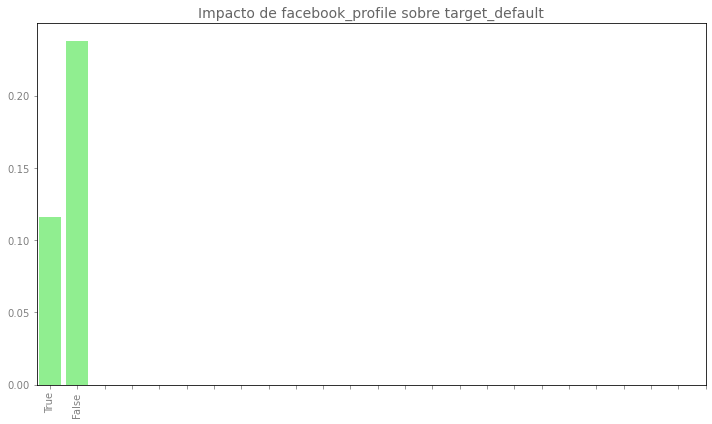

In [691]:
# chama a função de impacto entre colunas
relação_entre_2_colunas(df, 'facebook_profile', 'target_default', 'val')

### Regiões com maiores índices de default
Verificamos no mapa que a região nordeste e sudeste tem maiores índices.

<AxesSubplot:title={'center':'Regiões de default'}, xlabel='lon', ylabel='lat'>

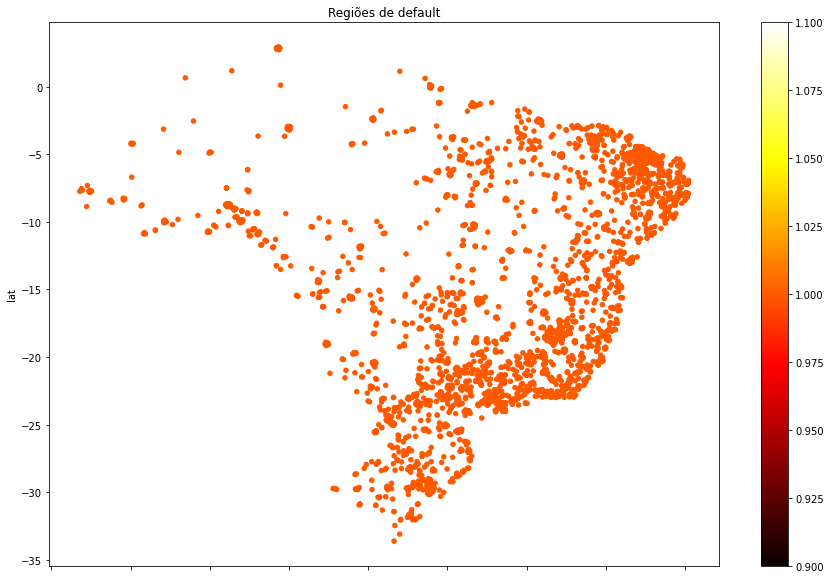

In [692]:
df['default_1'] = df.loc[df['target_default'] == 1, 'target_default']

df.plot.scatter(y="lat", 
                           x="lon",
                           c=df['default_1'],
                           cmap='hot',
                           figsize=(15,10),
                           title='Regiões de default')

In [693]:
# descartando colunas que não iremos mais pecisar
cols = ['lat', 'lon', 'default_1']
for col in cols:
    df = df.drop(col, axis=1)

# Preparação dos dados

In [694]:
# Verificando somente colunas categóricas
df.select_dtypes(include='object').head(4)

,facebook_profile,email,marketing_channel,shipping_state,profile_tags
0,True,outlook.com,Invite-email,MT,n19 n8
1,False,gmail.com,Radio-commercial,RS,n6 n7 nim
3,False,spgov.com,Waiting-list,RN,n4
4,True,gmail.com,Invite-email,MT,pro+aty n19 da b19


### - Transformando colunas categóricas em dummies

#### Usando Label Encoder:

In [695]:
# Aplicando o encoder
encoder = LabelEncoder().fit(df["facebook_profile"])
df["facebook_profile"] = encoder.transform(df["facebook_profile"])

#### Usando método get dummies do pandas (One Hot Encoder)

In [696]:
# No lugar do one-hot podemos usar get_dummies do Pandas (mesma coisa)

col_categoricas = ['email', 'marketing_channel', 'shipping_state']

#for col in col_categoricas:
df = pd.get_dummies(df, columns = col_categoricas)


#### Coluna profile_tags tem que ser feita na mão

In [697]:
# Transformando cada linha em uma lista de tags
df['profile_tags'] = df['profile_tags'].str.split()

In [698]:
todas_tags=[]
# Colocando cada tag em uma lista geral de tags
for tags in df['profile_tags']:
    for tag in tags:
        todas_tags.append(tag)

# Separando as tags únicas
tags_unicas = list(set(todas_tags))

# Transformando as tags únicas em uma coluna com 0 e 1s (dummies)
for tag in tags_unicas:
     df[tag] = df['profile_tags'].apply(lambda x: 1 if tag in x else 0)

# Excluindo a coluna profile tags
df.drop('profile_tags', axis=1, inplace=True)

### Tratando Multicolinearidade
O One-hot encoder (e tbm get_dummies do Pandas) pode gerar problema dammy variable trap caindo no problema da multicolinearidade onde as variáveis podem resumidamente "atrapalhar" mais que "ajudar" no nosso modelo, por isso medimos o nível de multicolinearidade com a tabela abaixo:<br>
* Tabela de medição multicolinearidade (VIF, variance inflation factor)
    - VIF = 1 : Menos multicolinearidade
    - VIF < 5 : multicolinearidade moderada
    - VIF > 5 : multicolinearidade extrema (isso que devemos evitar)
* Para evitar esse problema uma das variáveis dummies deve ser descartada, para isso iremos usar a função abaixo para medir o nível de pontuação VIF:

#### - Função de cálculo multicolinearidade

In [699]:
# Nível de pontuação VIF
import statsmodels.api as sm

def pontuação_vif(df):
    vif_df = pd.DataFrame(columns = ['var', 'vif'])
    x_var_names = df.columns
    
    # Para o número total de colunas na tabela
    for i in range(0, x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
        
    return vif_df.sort_values(by = 'vif', axis=0, ascending=True, inplace=False)
        

#### - Lista de colunas convertidas em dummies
Precisamos verificar a multicolinearidade nas colunas que foram convertidas em dummies

In [700]:
df_vif = df[['email_gmail.com',
       'email_hotmail.com', 'email_outlook.com', 'email_spgov.com',
       'marketing_channel_Facebook', 'marketing_channel_Instagram',
       'marketing_channel_Invite-email', 'marketing_channel_Invite-web',
       'marketing_channel_LinkedIn', 'marketing_channel_Radio-commercial',
       'marketing_channel_Twitter', 'marketing_channel_Waiting-list',
       'marketing_channel_Website', 'shipping_state_AC', 'shipping_state_AL',
       'shipping_state_AM', 'shipping_state_AP', 'shipping_state_BA',
       'shipping_state_CE', 'shipping_state_DF', 'shipping_state_ES',
       'shipping_state_GO', 'shipping_state_MA', 'shipping_state_MG',
       'shipping_state_MS', 'shipping_state_MT', 'shipping_state_PA',
       'shipping_state_PB', 'shipping_state_PE', 'shipping_state_PR',
       'shipping_state_RN', 'shipping_state_RO', 'shipping_state_RR',
       'shipping_state_RS', 'shipping_state_SC', 'shipping_state_SE',
       'shipping_state_SP', 'shipping_state_TO', 'n14', 'c1', 'n15', 'n10',
       'n8', 'n18', 'n11', 'a15', 'pro+aty', 'n12', 'n16', 'aty', 'n2', 'n3',
       'n5', 'n9', 'n6', 'n17', 'n1', 'dfa', 'n19', 'nim', 'c55', 'n0', 'b19',
       'n13', 'n4', 'n7', 'da']]


In [701]:
# calculando a pontuação vif
vif_df = pontuação_vif(df_vif)

In [702]:
# verificando a tabela vif
vif_df.head(4)

,var,vif
51,n3,1.0
40,n15,1.0
43,n18,1.0
58,n19,1.0


In [703]:
# pegando a lista de colunas com vif acima de 5 (multicolinearidade extrema)
lista = vif_df.loc[vif_df.vif > 5, 'var']
lista_multcol = []
for col in lista:
    lista_multcol.append(col)

In [704]:
# excluindo colunas com multicolinearidade extrema (38 colunas)
for col in lista_multcol:
    df.drop(col, axis=1, inplace=True)

**Resumo do tratamento de multicolineariade**
Quando convertemos colunas categoricas em variáveis dummies criamos mais 67 outras colunas no dataframe, destas 67, foi detectado que 38 delas estavam com multicolineariade acima de 5 da tabela VIF, onde decidimos excluir-las para não prejudicar nosso modelo.

# Normalização ou padronização 
Vamos realizar os 2 procedimentos ver o que tem melhor acurácia para depois escolher qual tipo de redimensionamento iremos escolher

### - Normalizando

In [705]:
from sklearn.preprocessing import MinMaxScaler

# Separando X e y
X = df.drop('target_default', axis=1)
y = df[['target_default']]

# instanciando a classe
scaler = MinMaxScaler(feature_range=(0, 1))

# normalizando
X_normaliz = scaler.fit_transform(X)

### - Padronizando

In [706]:
from sklearn.preprocessing import StandardScaler

# Separando X e y
X = df.drop('target_default', axis=1)
y = df[['target_default']]

# instanciando a classe
scaler = StandardScaler().fit(X)

# normalizando
X_padro = scaler.transform(X)

### - Criando nosso modelo

In [707]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# separando dados em folds
kfold  = KFold(n_splits=5, shuffle=False)

# criando modelo
modelo = KNeighborsClassifier()

### - Prevendo sem redimensionamento

In [708]:
res = cross_val_score(modelo, X, y, cv = kfold)
acc = res.mean() * 100
print(f'Acuracia de {acc}')

C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Acuracia de 81.59969802447063


### - Prevendo com dados normalizados

In [709]:
res = cross_val_score(modelo, X_normaliz, y, cv = kfold)
acc = res.mean() * 100
print(f'Acuracia de {acc}')

C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Acuracia de 81.8205725029521


### - Prevendo com dados padronizados

In [710]:
res = cross_val_score(modelo, X_padro, y, cv = kfold)
acc = res.mean() * 100
print(f'Acuracia de {acc}')

C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\devda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Acuracia de 82.17759542907034


##### Os dados padronizados "ganhou a batalha", então vamos escolher este método de redimensionamento.

# Balanceamento de classes
a coluna target_default está desbalanceada, encontramos mais amostras da classe 0 que da classe 1, isso induz o modelo a aprender mais sobre um e menos sobre o outro, então vamos balancear.<br>
Vamos usar a técnica Oversampling conhecida como SMOTE, que consiste em replicar a classe minoritária para contrabalancear com a classe majoritária.

**ATENÇÃO:** Lembando que não se deve realizar o balanceamento de classe antes do cross validation. [Para saber mais clique aqui!](https://github.com/dev-daniel-amorim/DS-Balanceamento_de_classes/blob/main/README.md)

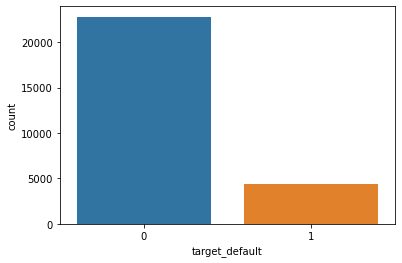

0    22783
1     4385
Name: target_default, dtype: int64

In [711]:
sns.countplot(x =df['target_default'])
plt.show()
df['target_default'].value_counts()

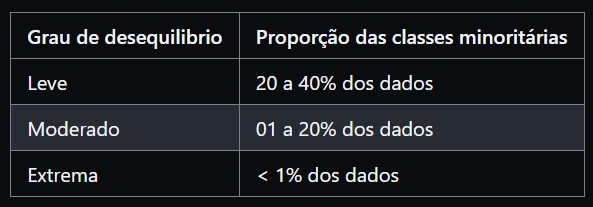

In [712]:
from IPython.display import Image
Image('balance.jpg')

In [713]:
proporcao = (df.target_default.value_counts()[1]/df.shape[0]) * 100
print(f'A classe minoritária corresponde a {proporcao:.2f}% dos dados')
print('Desequilibrio grau moderado')

A classe minoritária corresponde a 16.14% dos dados
Desequilibrio grau moderado


### - Balancear dados de treino sem balancear a validação
Aplico esse método pois o que buscamos em um modelo?

Resposta: Buscamos um modelo preditivo capaz de prever dados na vida real!

Com base nisso, não balanceamos os dados de validação, asim ele se mantem fiel a realidade da vida real, pois na vida real os dados não são balanceados, ENTENDEU a sacada? 

### - Separando dados de treino e teste

In [714]:
# temos que converter o array X_padro para dataframe X_padrodf 
# ou teremos problema com metodo iloc na função artesanal abaixo
X_padrodf = pd.DataFrame(X_padro, columns=X.columns)

In [715]:
from sklearn.model_selection import train_test_split

# Separando treino e teste (O teste a gente esquece por enquanto)
X_treino, X_test, y_treino, y_test = train_test_split(X_padrodf, y)

X_treino.shape, X_test.shape, y_treino.shape, y_test.shape

((20376, 47), (6792, 47), (20376, 1), (6792, 1))

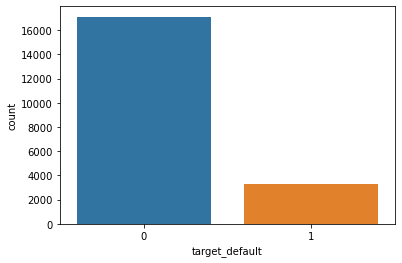

0    17104
1     3272
Name: target_default, dtype: int64

In [716]:
# y_treino continua desbalanceado
sns.countplot(x =y_treino['target_default'])
plt.show()
y_treino['target_default'].value_counts()

### - Agora vamos aplicar SMOTE (s/ validação balanceada)
O cross validation não é capaz de separar a validação sem balancea-la, para isso temos que fazer manualmente coma função abaixo.
O que iremos fazer, cria uma validação mais fiel a realidade, ou seja, seu modelo estará preparado para responder uma acurácia realista, pois como a validação não foi balanceada não corremos o risco de ser "enganado" pelo nosso modelo.

In [737]:
# função de validação cruzada "artesanal" para não balancear a validação
from sklearn.model_selection import KFold

# Oversamping = False nossa validação não será balanceada
def validacao_cruzada(modelo, X, y, oversampling=False):
    
    kfold = KFold(n_splits=10, shuffle=False, random_state=None) # n_split:divide em lotes, shuffle: embaralha antes de dividir 
    
    # Lista de acurácia
    acuracias_split = []
    
    # iterando sobres os splits de treino e validação (recebe os índices)
    for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(X)):
        X_split_treino = X.iloc[idx_treino, :]
        y_split_treino = y.iloc[idx_treino, :] 
        
        # oversampling = True, então executamos o balanceamento (SÓ NO TREINO)
        if oversampling:
            sm = SMOTE(random_state=40)
            X_split_treino, y_split_treino, = sm.fit_resample(X_split_treino, y_split_treino)
        
        # Vamos treinar nosso modelo
        modelo.fit(X_split_treino, y_split_treino.values.flatten())
        
        # A validação ficou de fora do SMOTE (balanceamento)
        X_split_validacao = X.iloc[idx_validacao, :]
        y_split_validacao = y.iloc[idx_validacao, :]
        
        # validacao SEM OVERSAMPLIG, que é o certo!
        # amostras desbalanceadas igual mundo real
        predições_validacao = modelo.predict(X_split_validacao)
        
        acuracia_split = accuracy_score(y_split_validacao, predições_validacao)
        
        acuracias_split.append(acuracia_split)
        
        acuracia_split = acuracia_split * 100

        print(f'Acurácia do split {idx + 1}: {acuracia_split:.2f}%')
        
    return acuracias_split, y_split_treino, y_split_validacao
        

### - Criando nosso modelo

In [718]:
from sklearn.ensemble import HistGradientBoostingClassifier
from statistics import mean
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Criando o modelo
modelo_hgb = HistGradientBoostingClassifier()

### - Aplicando nosso modelo sem oversampling
Sem balancear os dados de treino (e validação desbalanceada claro)

In [738]:
media_acuracia_sem_smote, treino, val = (validacao_cruzada(modelo_hgb, X_treino, y_treino, oversampling=False))

Acurácia do split 1: 84.20%
Acurácia do split 2: 83.37%
Acurácia do split 3: 84.79%
Acurácia do split 4: 84.15%
Acurácia do split 5: 84.10%
Acurácia do split 6: 84.59%
Acurácia do split 7: 83.16%
Acurácia do split 8: 84.24%
Acurácia do split 9: 84.19%
Acurácia do split 10: 83.95%


### - Aplicando nosso modelo com oversampling
Balanceando os dados de treino (e validação desbalanceada claro)

In [739]:
media_acuracia_com_smote, treino, val = (validacao_cruzada(modelo_hgb, X_treino, y_treino, oversampling=True))

Acurácia do split 1: 83.07%
Acurácia do split 2: 83.02%
Acurácia do split 3: 84.74%
Acurácia do split 4: 83.37%
Acurácia do split 5: 84.20%
Acurácia do split 6: 84.49%
Acurácia do split 7: 82.57%
Acurácia do split 8: 83.41%
Acurácia do split 9: 83.75%
Acurácia do split 10: 83.60%


In [740]:
s_smote = mean(media_acuracia_sem_smote) * 100
c_smote = mean(media_acuracia_com_smote) * 100
print('----------Média de acurácias ---------')
print(f'Sem Treino balanceado: {s_smote:.2f}%')
print(f'Com Treino balanceado: {c_smote:.2f}%')

----------Média de acurácias ---------
Sem Treino balanceado: 84.07%
Com Treino balanceado: 83.62%


### - Balanceamento da validação (Modo errado)
Executando o cross validation vai balancear a validação, a acurácia vai subir bastante, porém fugindo da realidade do mundo real, e podemos cair numa "ilusão".

Note que acurácia subiu pra 88,65% melhorou seu modelo? Não, cuidado pra não se iludir, somente a realidade está distorcida,uma realidade mascarada!

OBS: Usar a forma errada numa competição de DS você pode até ganhar pois o que importa é a acurácia, mas usar a forma errada numa empresa pode dar prejuizo para você e para a empresa!

In [741]:
from sklearn.model_selection import cross_val_score

# ERRADO! Não se deve balancear as classes antes do split
sm = SMOTE(random_state=40)
X_treinocv, y_treinocv = sm.fit_resample(X_treino, y_treino)

# Os splits criados no cross_val_score estão com a validação BALANCEADA
# E isso é distorcer a realidade!
media = mean(cross_val_score(modelo_hgb, X_treinocv, y_treinocv.values.flatten())) * 100
print(f'Média com o balanceamento da validação: {media:.2f}%')

Média com o balanceamento da validação: 88.65%
